# Replacing `pstats` with IPython Notebook

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import cProfile

from pstatsviewer import StatsViewer
from qgrid.installer import nbinstall
nbinstall()

In [5]:
# Sample Frames
df1 = pd.DataFrame(
    np.random.randn(5000, 8),
    columns=[chr(ord('A') + i) for i in range(8)],
    index=range(5000),
)
df2 = pd.DataFrame(
    np.random.randn(5000, 8),
    columns=[chr(ord('A') + i) for i in range(8)],
    index=range(5000, 10000),
)

In [6]:
df1.head()

,A,B,C,D,E,F,G,H
0,1.092945,0.838612,-0.185576,0.749517,0.359821,-0.696785,-0.608506,-0.575776
1,-0.833787,-1.446140,0.883597,0.164799,-0.680672,-0.021606,1.224225,1.074475
2,-1.908311,-0.498299,0.473258,0.031904,-0.627807,-0.413575,-0.098905,-0.541639
3,1.720888,0.099148,-0.419413,0.821687,0.005237,-0.352508,0.164945,1.462383
4,-2.168598,1.081475,-0.122772,-1.757206,0.768995,0.202645,-0.294359,0.779319


## Generating stats files with cProfile:

In [7]:
def concat_naive():
    for i in range(500):
        pd.concat([df1, df2])
        
cProfile.run(
    'concat_naive()',
    'naive.stats',
)

## Table/Grid View

Provides interactive support for:
- Scrolling
- Filtering
- Sorting
- Resizing Columns

In [8]:
slow = StatsViewer("naive.stats")
slow.grid()

## Chart View

Supports interactive generation of charts parameterized by no. of functions and sort order.

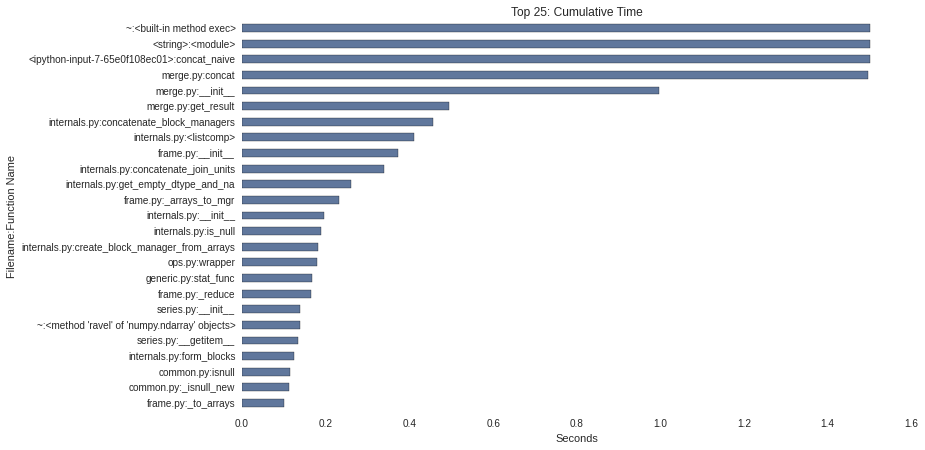

In [9]:
slow.chart()

## Comparing Alternative Implementations

In [10]:
def concat_fast():
    """
    Concatenate using numpy primitives instead of pd.concat.
    """
    for i in range(500):
        pd.DataFrame(
            np.vstack([df1.values, df2.values]),
            columns=df1.columns,
            index=np.hstack([
                df1.index.values,
                df2.index.values,
            ])
        )

cProfile.run(
    'concat_fast()',
    'fast.stats',
)
fast = StatsViewer("fast.stats")

## Comparison View

Both `chart` and `grid` support comparison versions.

In [11]:
slow.compare_grid(fast, lsuffix="_slow", rsuffix="_fast")

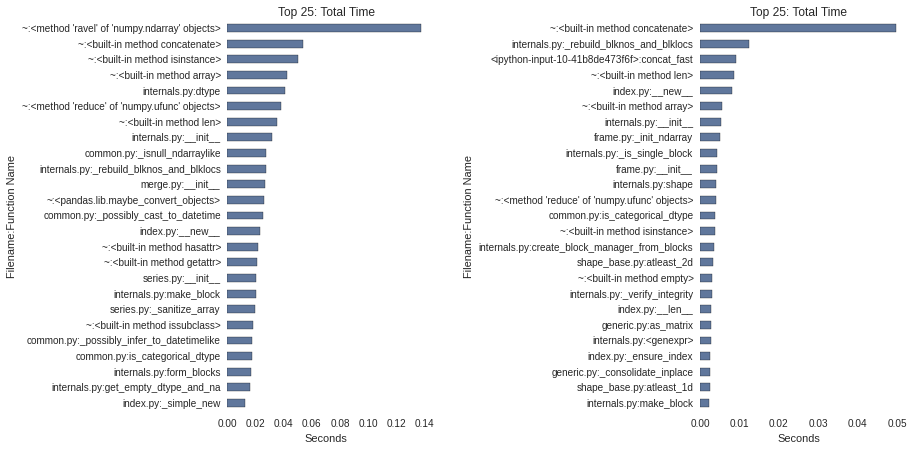

In [12]:
slow.compare_chart(fast, 'tottime', 25)

##How do it do it?

- cProfile output is loaded into a pandas `DataFrame`
- Chart View is implemented with IPython widget delegating to http://github.com/mwaskom/seaborn.
- Table View is implemented with http://github.com/quantopian/qgrid:
  - Built on top of IPython widgets and http://github.com/mleibman/SlickGrid.